In [1]:
import numpy as np

In [80]:
p=0.5
x = np.random.choice(a=[False, True], size=(6, 6), p=[p, 1-p])
x

array([[ True, False, False,  True,  True, False],
       [False,  True, False,  True, False, False],
       [ True, False,  True,  True,  True, False],
       [False, False, False, False, False,  True],
       [ True,  True, False,  True, False, False],
       [False,  True,  True,  True,  True, False]])

In [34]:
a=x[0]+x[1]
b=x[0]*x[1]
print(a)
print(b)

[ True  True False  True False False]
[ True False False  True False False]


In [35]:
pairs= x.reshape(2,len(x)//2,-1)
pairs

array([[[ True,  True, False,  True, False, False],
        [ True, False, False,  True, False, False],
        [ True,  True,  True,  True,  True, False]],

       [[False,  True,  True,  True,  True, False],
        [False, False, False, False, False, False],
        [ True, False,  True, False, False,  True]]])

In [36]:
pairs.shape

(2, 3, 6)

In [37]:
pairs[0].shape

(3, 6)

In [38]:
pairs[0]

array([[ True,  True, False,  True, False, False],
       [ True, False, False,  True, False, False],
       [ True,  True,  True,  True,  True, False]])

In [39]:
mask = np.random.choice(a=[False, True], size=(pairs.shape[1], pairs.shape[2]), p=[p, 1-p])
mask

array([[False,  True, False,  True,  True, False],
       [False, False,  True, False,  True,  True],
       [ True,  True,  True,  True,  True, False]])

In [40]:
cross = np.where(mask[1], pairs[1][0], pairs[1][1] )
cross

array([False, False,  True, False,  True, False])

In [43]:
cross = np.where(mask, pairs[0,:], pairs[1,:] )
cross

array([[False,  True,  True,  True, False, False],
       [False, False, False, False, False, False],
       [ True,  True,  True,  True,  True,  True]])

In [44]:
cross2 = np.where(np.random.choice(a=[False, True], size=(pairs.shape[1], pairs.shape[2])), pairs[0,:], pairs[1,:] )
cross2

array([[False,  True,  True,  True, False, False],
       [ True, False, False, False, False, False],
       [ True, False,  True, False,  True,  True]])

In [45]:
cross.shape

(3, 6)

In [70]:
c = np.stack([cross,cross2])
c

array([[[False,  True,  True,  True, False, False],
        [False, False, False, False, False, False],
        [ True,  True,  True,  True,  True,  True]],

       [[False,  True,  True,  True, False, False],
        [ True, False, False, False, False, False],
        [ True, False,  True, False,  True,  True]]])

In [49]:
c.shape

(2, 3, 6)

In [75]:
np.concatenate([pairs[:,i,:] if x else c[:,i,:] for i,x in enumerate(np.random.choice(a=[False, True], size=(pairs.shape[1],), p=[1-p, p]))])

(6, 6)

In [69]:
p = 0.25
choice = np.where(np.random.choice(a=[False, True], size=(pairs.shape[1],), p=[1-p, p]), pairs.transpose(1,0,2), c.transpose(1,0,2) )
choice

ValueError: operands could not be broadcast together with shapes (3,) (3,2,6) (3,2,6) 

In [61]:
np.random.choice(a=[False, True], size=(pairs.shape[1],), p=[1-p, p])

array([False, False, False])

In [52]:
np.random.rand(pairs.shape[1]) < p

array([ True,  True, False])

In [56]:
p=0.1
np.random.choice(a=[False, True], size=(10,), p=[1-p, p])

array([False, False, False, False, False, False, False, False, False,
       False])

ValueError: probabilities do not sum to 1

In [110]:
def cross2( x, prob=0.0):
        # Shuffle
        idx = np.arange(len(x))
        np.random.shuffle(idx)
        x = x[idx]

        # Split and compare
        pairs= x.reshape(2,len(x)//2,-1)
        mask = np.random.choice(a=[False, True], size=(pairs.shape[1], pairs.shape[2]))

        # Cross
        cross1 = np.where(mask, pairs[0,:], pairs[1,:] )
        cross2 = np.where(np.random.choice(a=[False, True], size=(pairs.shape[1], pairs.shape[2])), pairs[0,:], pairs[1,:] )
        cross = np.stack([cross1,cross2])

        # Decide
        return np.concatenate([ cross[:,i,:] if x else pairs[:,i,:] for i,x in enumerate(np.random.choice(a=[False, True], size=(pairs.shape[1],), p=[1-prob, prob]))])

In [111]:
p=0.5
x = np.random.choice(a=[False, True], size=(6, 6), p=[p, 1-p])
print(x)
cross2(x)

[[ True  True False  True  True False]
 [ True False False  True False  True]
 [ True  True  True  True False False]
 [ True False  True False  True  True]
 [False False False  True False  True]
 [False  True  True False False False]]
[ True False  True  True False False]
[[ True False False  True False  True]
 [False False False  True False  True]]
[ True False False  True False  True]
[False False False]


array([[ True,  True, False,  True,  True, False],
       [ True, False,  True, False,  True,  True],
       [ True, False, False,  True, False,  True],
       [False, False, False,  True, False,  True],
       [ True,  True,  True,  True, False, False],
       [False,  True,  True, False, False, False]])

In [132]:
np.logical_not(np.array([False, False, False, False, False, False, False, False, False, False]))

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [125]:
    def mutation(x, prob=0.1):
        inverse = np.logical_not(x)
        mask = np.random.choice(a=[False, True], size=x.shape, p=[1-prob, prob])
        x = np.where(mask, inverse, x)
        return x

In [129]:
mutation(np.array([False, False, False, False, False, False, False, False, False, False]))

array([False, False, False,  True, False, False, False, False, False,
       False])

In [131]:
x = np.array([1,6,4,7,5,3])
idx=np.argsort(x)
x[idx]

array([1, 3, 4, 5, 6, 7])

In [489]:
import numpy as np
import pandas as pd


class GA():
    def __init__(self, seed=7, verbose=True, init_fn=None, init_kwargs={}):
        np.random.seed(seed)
        self.verbose = verbose

        self.init_fn = init_fn
        self.init_kwargs = init_kwargs

        self.generations = []
        self.scores = []
        
    def _generation(self, x, scores):
        x2 = self.selection(x.copy(), scores.copy())
        x2 = self.cross(x2)
        x2 = self.mutation(x2)
        x = self.replacement(x, scores, len(x2))
        return np.concatenate([x,x2])
    
    def run(self, n_gen, cost_function):
        print('Starting Genetic Algorithm for %i loops' % n_gen)
        
        history = []
        x = self.init_fn(**self.init_kwargs)
        scores = np.array([cost_function(e) for e in x])
        best_score = np.min(scores)
        best_sample = x[np.argmin(scores)]
        
        if self.verbose:
            print('\t Loop %i - Best %.3f - Avg %.3f - Worst %.3f' %(0, np.min(scores), np.mean(scores), np.max(scores) ))
        history.append({'best':np.min(scores), 'mean':np.mean(scores), 'worst':np.max(scores)})

        for i in range(0, n_gen):
            # Run transformations
            x = self._generation(x, scores)
            scores = np.array([cost_function(e) for e in x])

            # Save the best result
            if np.min(scores) < best_score:
                best_score = np.min(scores)
                best_sample = x[np.argmin(scores)]
            else:
            # Make sure the best is still alive. Replace the worst by the best
                x[np.argmax(scores)] = best_sample
                scores[np.argmax(scores)] = best_score

            # Save generation results
            self.generations.append(x.copy())
            self.scores.append(scores)

            # Print generation results
            if self.verbose:
                print('\t Loop %i - Best %.3f - Avg %.3f - Worst %.3f' %(i+1, np.min(scores), np.mean(scores), np.max(scores) ))
            history.append({'best':np.min(scores), 'mean':np.mean(scores), 'worst':np.max(scores)})
            
        self.best_sample = best_sample
        self.best_score = best_score
        
        return pd.DataFrame(history)
    
    def selection(self, x, scores):
        # Shuffle
        idx = np.arange(len(x))
        np.random.shuffle(idx)
        x = x[idx]
        scores = scores[idx]
        
        # Split and compare
        splits = scores.reshape(len(scores)//2,2)
        winners = splits.argmin(axis=1)
        x = x.reshape(2,len(x)//2,-1)
        x = np.stack([x[winners[i],i,:] for i in range(x.shape[1])])        

        return x

    def cross(self, x, prob=0.5):
        # Shuffle
        idx = np.arange(len(x))
        np.random.shuffle(idx)
        x = x[idx]

        # Split and compare
        pairs= x.reshape(2,len(x)//2,-1)
        mask = np.random.choice(a=[False, True], size=(pairs.shape[1], pairs.shape[2]))

        # Cross
        cross1 = np.where(mask, pairs[0,:], pairs[1,:] )
        cross2 = np.where(np.random.choice(a=[False, True], size=(pairs.shape[1], pairs.shape[2])), pairs[0,:], pairs[1,:] )
        cross = np.stack([cross1,cross2])

        # Decide
        return np.concatenate([cross[:,i,:] if x else pairs[:,i,:] for i,x in enumerate(np.random.choice(a=[False, True], size=(pairs.shape[1],), p=[1-prob, prob]))])
    
    def mutation(self, x, prob=0.05):
        inverse = np.logical_not(x)
        mask = np.random.choice(a=[False, True], size=x.shape, p=[1-prob, prob])
        x = np.where(mask, inverse, x)
        return x

    def replacement_random(self, population, children):
        size = len(population)
        size = size - len(children)
        return np.concatenate([children, population[np.random.choice(range(0,len(population)), size)]], axis=0)
    
    def replacement(self, x, scores, n_remove):
        # Shuffle
        idx = np.argsort(scores)
        x = x[idx]
        scores = scores[idx]
        x=x[:len(x)-n_remove]

        return x

    
def init_fn(n_elements, n_features):
    return np.random.choice(a=[False, True], size=(n_elements,n_features))

def cost_fn(x):
    return -np.sum([e*(2**i)*(-1*(i%2)) for i,e in enumerate(x)])

In [490]:
np.random.seed(42)
x = init_fn(12,5)
print(x)
scores = np.arange(12)
scores

[[False  True False False False]
 [ True False False False  True]
 [False False False False  True]
 [False  True  True  True False]
 [ True False  True  True  True]
 [ True  True  True  True  True]
 [False False  True  True  True]
 [False  True False False False]
 [False False  True  True  True]
 [ True  True False  True  True]
 [False  True False  True False]
 [ True  True False False False]]


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [491]:
splits = scores.reshape(2,len(scores)//2)
splits

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [492]:
winners = splits.argmax(axis=0)
winners

array([1, 1, 1, 1, 1, 1])

In [493]:
x = x.reshape(2,len(x)//2,-1)
x

array([[[False,  True, False, False, False],
        [ True, False, False, False,  True],
        [False, False, False, False,  True],
        [False,  True,  True,  True, False],
        [ True, False,  True,  True,  True],
        [ True,  True,  True,  True,  True]],

       [[False, False,  True,  True,  True],
        [False,  True, False, False, False],
        [False, False,  True,  True,  True],
        [ True,  True, False,  True,  True],
        [False,  True, False,  True, False],
        [ True,  True, False, False, False]]])

In [494]:
np.stack([x[winners[i],i,:] for i in range(x.shape[1])])


array([[False, False,  True,  True,  True],
       [False,  True, False, False, False],
       [False, False,  True,  True,  True],
       [ True,  True, False,  True,  True],
       [False,  True, False,  True, False],
       [ True,  True, False, False, False]])

In [495]:
x.shape

(2, 6, 5)

In [496]:
cost_fn(x[0])

188

In [504]:
ga = GA(init_fn=init_fn, init_kwargs={'n_elements':20, 'n_features':40})
df = ga.run(10, cost_fn)
df

Starting Genetic Algorithm for 10 loops
	 Loop 0 - Best 8600584224.000 - Avg 324145814410.700 - Worst 732326144034.000
	 Loop 1 - Best 8600584224.000 - Avg 198594160183.100 - Worst 723738305152.000
	 Loop 2 - Best 8600584224.000 - Avg 100910780899.900 - Worst 584686019072.000
	 Loop 3 - Best 681746592.000 - Avg 56845401109.600 - Worst 595558146688.000
	 Loop 4 - Best 145392160.000 - Avg 67949348895.500 - Worst 593410261632.000
	 Loop 5 - Best 143262240.000 - Avg 53690110076.600 - Worst 593284432000.000
	 Loop 6 - Best 10649632.000 - Avg 54313753714.600 - Worst 695928004608.000
	 Loop 7 - Best 10616864.000 - Avg 74535763489.900 - Worst 695928004608.000
	 Loop 8 - Best 174112.000 - Avg 46006449729.900 - Worst 695919616000.000
	 Loop 9 - Best 174112.000 - Avg 8359589930.400 - Worst 139731304616.000
	 Loop 10 - Best 174112.000 - Avg 906512857.100 - Worst 8600594472.000


,best,mean,worst
0,8600584224,3.241458e+11,732326144034
1,8600584224,1.985942e+11,723738305152
2,8600584224,1.009108e+11,584686019072
3,681746592,5.684540e+10,595558146688
4,145392160,6.794935e+10,593410261632
5,143262240,5.369011e+10,593284432000
6,10649632,5.431375e+10,695928004608
7,10616864,7.453576e+10,695928004608
8,174112,4.600645e+10,695919616000
9,174112,8.359590e+09,139731304616


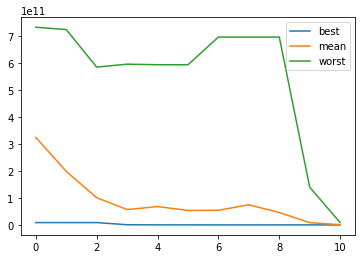

In [505]:
df.plot(kind='line')